(1, 381, 1, 14440)
(14440, 1)


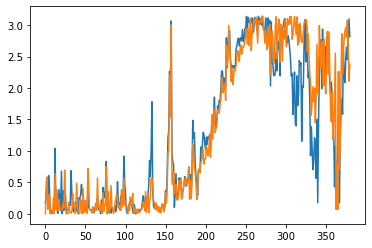

In [9]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Store in variables: (X_train, Y_train)
x = loadmat("ml_features.mat")
X_train = x['ml_features']
X_train = np.asarray(X_train)

y = loadmat("ground_truth_angles.mat")   
Y_train = y['ground_truth_angles']
Y_train = np.asarray(Y_train)

print(X_train.shape)
print(Y_train.shape)

# 381 features
# 14440 data points

# index id where angle = 0 and 90
id_0 = Y_train==0
id_0 = id_0[:,0]
id_90 = Y_train==90
id_90 = id_90[:,0]

# features where angle = 0 and 90
feature_0 = X_train[0,:,0,id_0]
feature_90 = X_train[0,:,0,id_90]

# plotting the features
plt.figure()
plt.plot(feature_0[1,:])
plt.plot(feature_90[1,:])
plt.show()

In [10]:
#I made new varialbes in a shape that more closely related a tutorial I was following
x_t = np.empty(shape=(11552,381),dtype='float') #x_t for 'x training data'
y_t = np.empty(shape=(11552,1),dtype='float') 

x_v = np.empty(shape=(2888,381),dtype='float') #x_v for 'x valitdating data'
y_v = np.empty(shape=(2888,1),dtype='float')

x = np.linspace(0,14439, 14440, dtype=int)
count = int(0)
for i in x:
    if i%5 == 0:
        b = int(i/5)
        x_v[b,:] = X_train[:,:,:,i].flatten()
        y_v[b] = Y_train[i]
        count = count + 1
    else:
        x_t[i-count,:] = X_train[:,:,:,i].flatten()
        y_t[i-count] = Y_train[i]
y_v = y_v.flatten()
y_t = y_t.flatten()

In [11]:
#making a model with 4 layers
#starts with 381 input values fot the 381 features
#does some random stuff idk
#ends with a guess of which 360 angles
model = keras.Sequential([
    keras.layers.Dense(units=381, input_shape=(381,), activation='elu'),
    keras.layers.Dense(units=300, activation='sigmoid'),
    keras.layers.Dense(units=200, activation='relu'),
    keras.layers.Dense(units=360, activation='softmax')
])

In [25]:
#Here the model is being trained with out training dataset and tested with our validation dataset
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(), 
    validation_steps=3
)

Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 5.2260 - accuracy: 0.0120 - val_loss: 3.7027 - val_accuracy: 0.0469
Epoch 2/10
500/500 [==============================] - 3s 6ms/step - loss: 3.6539 - accuracy: 0.0627 - val_loss: 2.8684 - val_accuracy: 0.1224
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 2.8390 - accuracy: 0.1279 - val_loss: 2.5459 - val_accuracy: 0.1120
Epoch 4/10
500/500 [==============================] - 3s 6ms/step - loss: 2.5767 - accuracy: 0.1570 - val_loss: 2.4202 - val_accuracy: 0.1536
Epoch 5/10
500/500 [==============================] - 3s 6ms/step - loss: 2.4378 - accuracy: 0.1764 - val_loss: 2.3185 - val_accuracy: 0.1901
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 2.3399 - accuracy: 0.1939 - val_loss: 2.1075 - val_accuracy: 0.2370
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 2.2266 - accuracy: 0.2214 - val_loss: 2.1147 - val_accuracy: 0.2135
Epoch 

In [12]:
# This is all kinda unrelated to the stuff above but its a method I found online
#Second place
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_t, y_t)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_t, y_t)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_v, y_v)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.55


In [13]:
#
from sklearn.linear_model import LinearRegression

logreg = LinearRegression()
logreg.fit(x_t, y_t)

print('Accuracy of Linear regression classifier on training set: {:.2f}'
     .format(logreg.score(x_t, y_t)))
print('Accuracy of Linear regression classifier on test set: {:.2f}'
     .format(logreg.score(x_v, y_v)))

Accuracy of Linear regression classifier on training set: 0.93
Accuracy of Linear regression classifier on test set: 0.96
